In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("ashrae-energy-prediction/train.csv")
weath_train = pd.read_csv("ashrae-energy-prediction/weather_train.csv")
build_meta = pd.read_csv("ashrae-energy-prediction/building_metadata.csv")

In [3]:
train.shape

(20216100, 4)

In [4]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [8]:
weath_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [11]:
build_meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [12]:
train.timestamp = pd.to_datetime(train.timestamp)

In [13]:
weath_train.timestamp = pd.to_datetime(weath_train.timestamp)

In [14]:
## merge building metadata and train dataset
build_train_merged = pd.merge(build_meta, train, on='building_id', how='inner')

In [15]:
build_train_merged.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0
1,0,0,Education,7432,2008.0,NaN,0,2016-01-01 01:00:00,0.0
2,0,0,Education,7432,2008.0,NaN,0,2016-01-01 02:00:00,0.0
3,0,0,Education,7432,2008.0,NaN,0,2016-01-01 03:00:00,0.0
4,0,0,Education,7432,2008.0,NaN,0,2016-01-01 04:00:00,0.0


In [16]:
build_train_merged.shape

(20216100, 9)

In [17]:
master_data = pd.merge(build_train_merged, weath_train, on = ['site_id','timestamp'], how='inner')

In [18]:
master_data.head(100).to_csv("sample.csv")

In [19]:
master_data.shape

(5, 16)

In [21]:
master_data.describe()

,site_id,building_id,square_feet,year_built,floor_count,meter,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,5.0,5.0,5.0,5.0,0.0,5.0,5.0,5.000000,4.0,5.000000,4.00000,5.000000,5.000000,5.000000
mean,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,22.660000,3.0,20.560000,-0.50000,1020.040000,64.000000,0.820000
std,0.0,0.0,0.0,0.0,NaN,0.0,0.0,2.123205,2.0,0.550454,0.57735,0.207364,108.305125,1.188276
min,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,20.000000,2.0,20.000000,-1.00000,1019.700000,0.000000,0.000000
25%,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,21.100000,2.0,20.000000,-1.00000,1020.000000,0.000000,0.000000
50%,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,22.800000,2.0,20.600000,-0.50000,1020.100000,0.000000,0.000000
75%,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,24.400000,3.0,21.100000,0.00000,1020.200000,70.000000,1.500000
max,0.0,0.0,7432.0,2008.0,NaN,0.0,0.0,25.000000,6.0,21.100000,0.00000,1020.200000,250.000000,2.600000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ed0cdd0>,
      dtype=object)

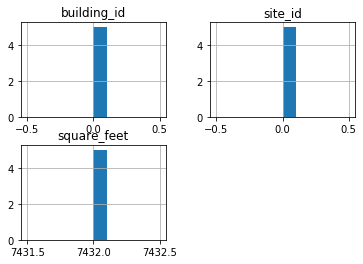

In [24]:
master_data.hist(column=['site_id','building_id','square_feet'])